{'result': {'landmarks': [{'name': 'Bunker Hill Monument', 'confidence': 0.976844847202301}]}, 'requestId': '3791cb7f-138d-4938-8126-c900128397dd', 'metadata': {'width': 1200, 'height': 1600, 'format': 'Jpeg'}}


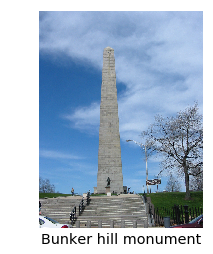

In [2]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "9438c593902948179871edf1cf0033c6"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

landmark_analyze_url = vision_base_url + "models/landmarks/analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/f/f6/" + \
    "Bunker_Hill_Monument_2005.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'model': 'landmarks'}
data    = {'url': image_url}
response = requests.post(
    landmark_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The
# most relevant landmark for the image is obtained from the 'result' property.
analysis = response.json()
assert analysis["result"]["landmarks"] is not []
print(analysis)
landmark_name = analysis["result"]["landmarks"][0]["name"].capitalize()

# Display the image and overlay it with the landmark name.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(landmark_name, size="x-large", y=-0.1)